In [ ]:
# Importing necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the Dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/almabetter/Dataset.csv')

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1971,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1971,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1971,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1971,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1972,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2020,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2020,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2021,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2021,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2021,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [ ]:
#check shape of the dataset
df.shape

(203, 14)

In [ ]:
#check which features have how much non-null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 22.3 KB


In [ ]:
df.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1995.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1971.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1983.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1996.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,2008.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2021.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


#***As we can observe, the first starting date is 1959 Quarter 1 and the ending date is 2009 Quarter 3. Therefore, creating a data range from 1971Q1 to 2021Q3 and assigning it to the index of the dataframe.***

In [ ]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1971Q1','2021Q3'))
df.index = index

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1971-03-31,1971,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1971-06-30,1971,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1971-09-30,1971,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1971-12-31,1971,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1972-03-31,1972,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
#drop year and quarter because we have already converted into index
df=df.drop(['year','quarter'],axis=1)

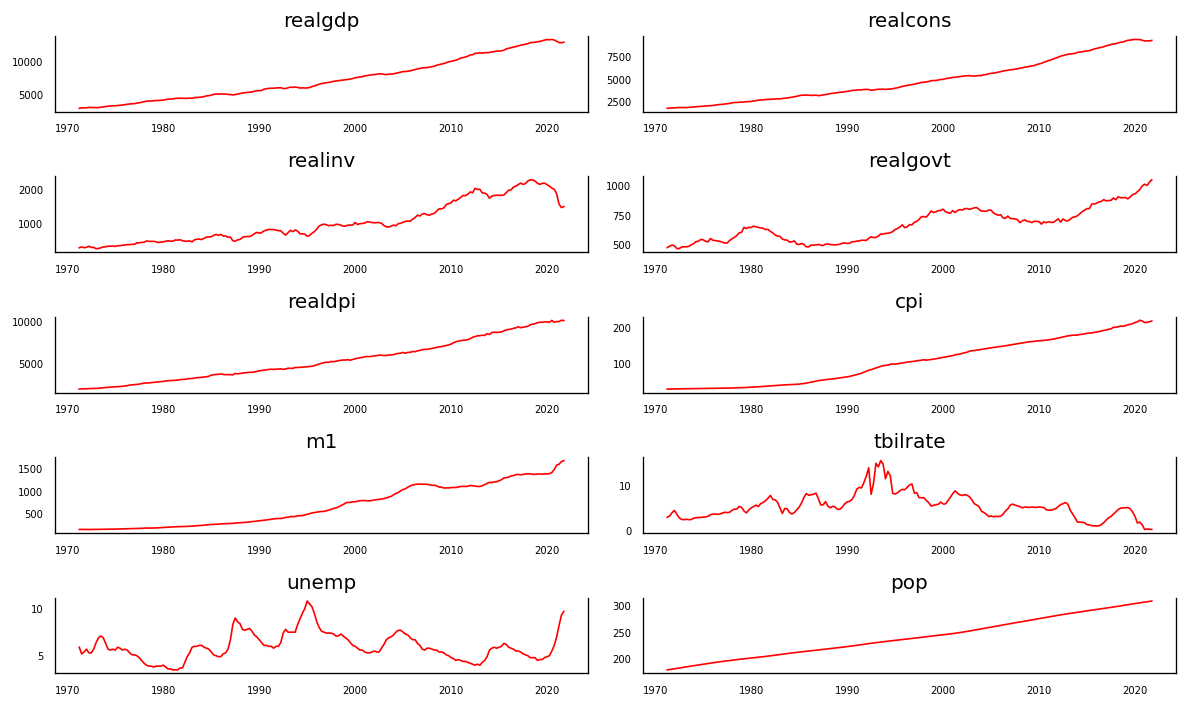

In [ ]:
#plot the trend of each feature
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#**we will use one popular statistical test – Augmented Dickey-Fuller Test (ADF Test) to check the stationary of variable.**

#**we use adfuller function in the statsmodels package for stationary test of variables. The Null Hypothesis is that the data has unit root and is not stationary and the significant value is 0.05**

In [ ]:
ad_fuller_result_1 = adfuller(df['realgdp'])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['realcons'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: 1.7504627967647217
p-value: 0.9982455372335032

---------------------

realcons
ADF Statistic: 1.549912338050964
p-value: 0.9976992503412904


In [ ]:
ad_fuller_result_1 = adfuller(df['realgdp'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['realcons'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -6.305695561658111
p-value: 3.3278821876681194e-08

---------------------

realcons
ADF Statistic: -4.204306080845249
p-value: 0.0006479282158627514


In [ ]:

print('realgdp causes realcons ?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['realcons', 'realgdp']], 4)

print('\realcons causes realgdp ?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['realgdp', 'realcons']], 4)

realgdp causes realcons ?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6290  , p=0.0108  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=6.7289  , p=0.0095  , df=1
likelihood ratio test: chi2=6.6193  , p=0.0101  , df=1
parameter F test:         F=6.6290  , p=0.0108  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5221  , p=0.0829  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=5.1729  , p=0.0753  , df=2
likelihood ratio test: chi2=5.1074  , p=0.0778  , df=2
parameter F test:         F=2.5221  , p=0.0829  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6062  , p=0.6117  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=1.8845  , p=0.5967  , df=3
likelihood ratio test: chi2=1.8756  , p=0.5986  , df=3
parameter F test:         F=0.6062  , p=0.6117  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ss

In [ ]:
#Take only two variable i.e realcons and realgdp 
df = df[['realcons','realgdp']]
print(df.shape)

(203, 2)


In [ ]:
#train test split
train_df=df[:-5]
test_df=df[-5:]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(198, 2)
(5, 2)


In [ ]:
model = VAR(train_df.diff()[1:])

In [ ]:
#chose the best value of  Order Selection
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.47       14.51   1.929e+06       14.49
1        14.20      14.31*   1.473e+06       14.25
2        14.15       14.33   1.400e+06       14.22
3       14.07*       14.32  1.287e+06*      14.17*
4        14.11       14.43   1.344e+06       14.24
5        14.13       14.53   1.373e+06       14.29
6        14.17       14.64   1.432e+06       14.36
7        14.17       14.71   1.429e+06       14.39
8        14.17       14.78   1.432e+06       14.42
9        14.20       14.88   1.473e+06       14.48
10       14.23       14.98   1.516e+06       14.53
11       14.26       15.09   1.567e+06       14.60
12       14.25       15.15   1.547e+06       14.61
13       14.25       15.22   1.551e+06       14.64
14       14.27       15.31   1.582e+06       14.69
15       14.30       15.41   1.629e+06       14.75
16       14.31       15.50   1.

#**Model Training**

In [ ]:
#model fitting with best hyperparameters
var_model = VARMAX(train_df, order=(3,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realcons', 'realgdp']   No. Observations:                  198
Model:                              VAR(3)   Log Likelihood               -1946.565
                               + intercept   AIC                           3927.130
Date:                     Sun, 22 Aug 2021   BIC                           3983.030
Time:                             13:59:23   HQIC                          3949.756
Sample:                         03-31-1971                                         
                              - 06-30-2020                                         
Covariance Type:                       opg                                         
Ljung-Box (Q):                49.50, 36.60   Jarque-Bera (JB):           4.30, 3.27
Prob(Q):                        0.14, 0.62   Prob(JB):                   0.12, 0.19
Heteroskedasticity (H):         1.83, 2.67   Skew:                       0.0

#**Model Testing**

In [ ]:
n_forecast = 5
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2020-09-30",end='2021-09-30	')
predictions=predict.predicted_mean

In [ ]:
#create a dataframe of predicted data
predictions.columns=['realcons_predicted','realgdp_predicted']
predictions

,realcons_predicted,realgdp_predicted
2020-09-30,9350.954948,13386.250243
2020-12-31,9360.570509,13378.263772
2021-03-31,9367.968322,13371.040039
2021-06-30,9378.941458,13370.285056
2021-09-30,9389.806975,13371.567072


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

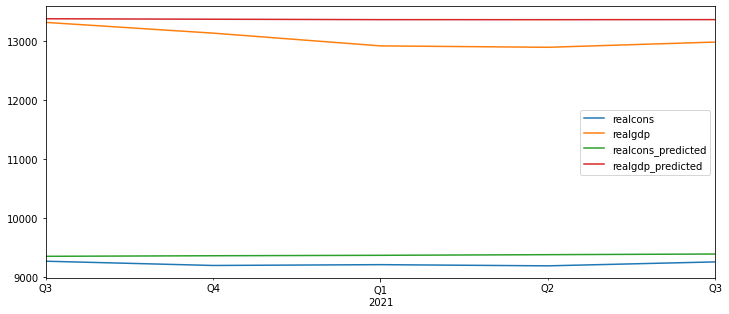

In [ ]:
test_vs_pred.plot(figsize=(12,5))

#**Model evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_realgdp=math.sqrt(mean_squared_error(test_df['realgdp'],predictions['realgdp_predicted']))
print('Mean value of realgdp is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['realgdp']),rmse_realgdp))

rmse_realcons=math.sqrt(mean_squared_error(test_df['realcons'],predictions['realcons_predicted']))
print('Mean value of realcons is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['realcons']),rmse_realcons))

Mean value of realgdp is : 13056.755. Root Mean Squared Error is :353.0819334068914
Mean value of realcons is : 9223.44. Root Mean Squared Error is :150.6221574328316


#**Accuracy**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
error = mean_absolute_percentage_error(test_df['realgdp'],predictions['realgdp_predicted'])
print("Mean Absolute Percentage Error of realgdp is : {0:.2f}%".format(error))
accuracy=(100-error)
print("Accuracy of  of realgdp is : {0:.2f}%".format(accuracy))

Mean Absolute Percentage Error of realgdp is : 2.46%
Accuracy of  of realgdp is : 97.54%


#**Our model was wrong by  2.46% on average, which is very, very good**

#**Accuracy of  of realgdp is : 97.54%**

#**Forecast Gross Domestic Product (realgdp) for next 6 quarter.**


In [ ]:
n_forecast = 11
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
predictions=predict.predicted_mean

In [ ]:
predictions.columns=['realcons_predicted','realgdp_predicted']
predictions

,realcons_predicted,realgdp_predicted
2020-09-30,9350.954948,13386.250243
2020-12-31,9360.570509,13378.263772
2021-03-31,9367.968322,13371.040039
2021-06-30,9378.941458,13370.285056
2021-09-30,9389.806975,13371.567072
2021-12-31,9401.967958,13375.963723
2022-03-31,9414.281775,13381.919883
2022-06-30,9427.019077,13389.454042
2022-09-30,9439.781845,13397.923898
2022-12-31,9452.575902,13407.160553


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

#**Prediction for next 6 quarters**

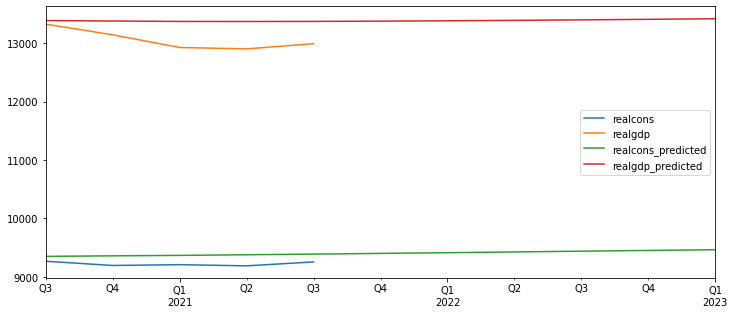

In [ ]:
test_vs_pred.plot(figsize=(12,5))